# PROJET PYTHON : VWAP

***Table de matière***
> Objectif

***I. INPUT***
  > 1. Importation des Bibliothèques (Déja installées)
  > 2. Importation des données 
             a- Chemin
             b- Dictionnaire
             c- Liste
             
***II. MANIPULATION DES DONNEES***
   > 1. Préparation du DataFrame
             a- De Liste à DataFrame
             b- Structures et informations
   > 2. Les colonnes
   
   > 3. DataFrame global

****III. CALCUL ET VISUALISATION****
 
   > 1.Intervalles de temps
   
   > 2.Le VWAP
   
   
   > 3. Rendu projet Python
          a- Pivot
          b- Valeurs manquantes
          c- DataFrame final
   > 4.Exploration de la donnée produite 


***I. INPUT***
  > 1. Importation des Bibliothèques (Déja installées)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from pathlib import Path
from zipfile import ZipFile 

 2. Importation des données
        a. Chemin
- ***os.getcwd( )*** 
    - offre la possibilité de connaître le chemin de mon répertoire
- ***glob( )*** 
    - faire des recherches dans mes chemins
    - me permet de rechercher toutes les bases de données en une ligne de code
- ***os.path.join( )*** 
    - joindre mon chemin avec mes données : actualisation en temps et en heure si les fichiers.csv sont modifiés

In [2]:
""" chemin relatif du fichier data.zip 
Merci de déposer le data.zip dans le répertoire retourné par la commande "path_script" """

path_script = os.getcwd() 

path_data_zip = os.path.join(path_script, "data.zip") #chemin absolue pour atteindre le fichier data.zip

In [ ]:
path_script

In [ ]:
#Ci-dessous, nous décompressons notre fichier zip "data.zip" dans lequel se trouve tout nos exchanges

with ZipFile(path_data_zip, 'r') as zip:
    zip.printdir() # afficher tout le contenu du fichier zip
    zip.extractall() # extraire tous les fichiers

In [5]:
path_data = os.path.join(path_script, "data") #variable chemin absolu du repertoire data contenant tout nos exchanges

In [6]:
# Nous allons vérifier que le "data.zip" a été bien dézippé , et que tout nos exchanges  sont présent
data = glob.glob(path_data + "/*.csv") # * est une regexp permettant de prendre tout les fichiers terminant par .csv

In [ ]:
data

b. dictionnaire

Ci-dessous, nous allons définir un dictionnaire "dico" avec pour éléments:
    - clés = nom des exchanges
    - valeurs = valeurs des exchanges
    - Accès aux valeurs grâce à leurs clés
Et nous allons le coupler à un split( ) pour séparer nos chaînes de caractère afin d'obtenir le nom de nom exchanges

In [8]:
dico = {}
# extraction du nom des exchanges( sans extension) de la liste data
for values in data:
    name = values.split("\\")
    new_name = name[-1].split(".") #Nous recuperons le nom de l'exchange sans l'extension
    dico[new_name[0]] = values

c. Liste

- ***liste = [ ]*** 
    - liste qui contiendra toutes mes data
- ***for*** sequence ***in*** chaine ***:***
    - charger mes data, ajout du nom de mon exchange dans une colonne, indexer 'timestamp' de type datetime et stocker toutes mes données dans une liste
- ***dictionnaire.items( )***
    - renvoie une liste, contenant les couples clé : valeur, sous forme de tuple
    - me permet de parcourir les clés et les valeurs simultanément
- ***pd.read_csv( )*** 
    - permet d'importer mes data et créer un DataFrame à partir de fichiers.csv
- ***liste.append( )***
    - stcoker mes data dans une liste

In [9]:
ma_liste = []
# création de ma liste
for keys,values in dico.items():
# boucle qui va importer mes données et les stockées dans ma liste
    df = pd.read_csv(values, index_col = 'timestamp', parse_dates = True)
# dataframe = lire les fichiers.csv du(chemin de ma data, en indexant la colonne 'timestamp', de type DateTime)
    df['Exchange'] = keys
# mon dataframe['ajoute la colonne'] = de mes clés
# permet d'avoir le nom de mon exchange pour chaque valeurs de cet exchange
    ma_liste.append(df)
# je stocke les données dans ma liste
    

In [10]:
bitcoin = pd.concat(ma_liste, axis = 0)


In [11]:
bitcoin

,price,amount,Exchange
timestamp,,,
2021-02-24 23:59:33.720,49712.15,0.005400,bfly
2021-02-24 23:44:16.980,49603.44,0.077000,bfly
2021-02-24 22:32:39.320,48864.19,0.120000,bfly
2021-02-24 22:15:19.030,48252.47,0.120000,bfly
2021-02-24 22:15:17.157,48247.38,0.120000,bfly
...,...,...,...
2021-02-24 00:00:37.000,48940.36,0.727027,stmp
2021-02-24 00:00:37.000,48940.36,0.284797,stmp
2021-02-24 00:00:37.000,48940.36,0.079944,stmp


***II. MANIPULATION DES DONNEES***
   > 1. Préparation du DataFrame
           a- De Liste à DataFrame
   
- ***pd.concat( )*** 
    - concaténer toutes les données en un DataFrame

In [12]:
bitcoin = pd.concat(ma_liste, axis = 0) # dataframe = concaténation(des éléments de ma liste, en ligne)

b - Analyse

- ***DataFrame.info( )*** = informations sur mon dataframe
- ***DataFrame.shape*** = taille de mon dataframe
- ***DataFrame.head( )*** = visualiser les premiers éléments de mon dataframe
- ***DataFrame.tail( )*** = visualiser les derniers éléments de mon dataframe
- ***DataFrame.isna( ).sum( )*** = connaître la somme des valeurs manquantes
-***DataFrame.describ***=renvoie les statistiques elementaires 

bitcoin.info()

In [13]:
bitcoin.shape # contient 1 136 793 lignes et 4 colonnes

(1136793, 3)

In [14]:
bitcoin.head() 

,price,amount,Exchange
timestamp,,,
2021-02-24 23:59:33.720,49712.15,0.0054,bfly
2021-02-24 23:44:16.980,49603.44,0.0770,bfly
2021-02-24 22:32:39.320,48864.19,0.1200,bfly
2021-02-24 22:15:19.030,48252.47,0.1200,bfly
2021-02-24 22:15:17.157,48247.38,0.1200,bfly


In [15]:
bitcoin.isna().sum()


price       0
amount      0
Exchange    0
dtype: int64

In [16]:
bitcoin.describe()

,price,amount
count,1.136793e+06,1.136793e+06
mean,4.971754e+04,6.611149e-02
std,8.710434e+02,2.458871e-01
min,4.690200e+04,1.000000e-08
25%,4.913686e+04,3.892400e-04
50%,4.975175e+04,5.000000e-03
75%,5.040400e+04,3.897457e-02
max,5.145951e+04,5.000000e+01


  2. Les colonnes

La fonction du Volume Weighted Average Price est : 

Pour que la somme du numérateur soit exacte, il faut ajouter une colonne prix * quantité. Cela permettra d'avoir le prix pondéré par heure par exchange.

- ***DataFrame.insert( )*** 
    - ajout d'une colonne dans mon dataframe
    - me permet d'avoir la multiplication prix - quantité de chaque horaire pour chaques lignes de mon dataframe et d'en indiquer l'emplacement

In [17]:
bitcoin.insert(2, 'Price_Amount', bitcoin.price * bitcoin.amount) #Insertion d'une colonne(au troisième emplacement, 'nom de ma colonne', valeurs de ma colonne)

 3. DataFrame global
 
 - ***DataFrame.drop( )***
    - me permet de supprimer une colonne
    - ici, utilisée pour créer un nouveau dataframe global
- ***.sum( )***
    - fonction d'aggrégation qui me permet de connaître la somme
 Afin de calculer le VWAP global, il faut que  créer un nouveau DataFrame, qui ne tiens pas compte des différentes salles d'exchanges.

In [18]:
# le dataframe global = le dataframe initial (avec tous les exchanges).dont le supprime('la colonne', sur l'axe des abscisses)
global_par_heurs =  bitcoin.drop('Exchange', axis = 1)

In [19]:
global_par_heurs 

,price,amount,Price_Amount
timestamp,,,
2021-02-24 23:59:33.720,49712.15,0.005400,268.445610
2021-02-24 23:44:16.980,49603.44,0.077000,3819.464880
2021-02-24 22:32:39.320,48864.19,0.120000,5863.702800
2021-02-24 22:15:19.030,48252.47,0.120000,5790.296400
2021-02-24 22:15:17.157,48247.38,0.120000,5789.685600
...,...,...,...
2021-02-24 00:00:37.000,48940.36,0.727027,35580.949406
2021-02-24 00:00:37.000,48940.36,0.284797,13938.066239
2021-02-24 00:00:37.000,48940.36,0.079944,3912.497928


In [20]:
# le dataframe global['ajoute une colonne'] = dont la valeur sera 'global'
global_par_heurs ['Exchange'] = 'global'

In [21]:
global_par_heurs 

,price,amount,Price_Amount,Exchange
timestamp,,,,
2021-02-24 23:59:33.720,49712.15,0.005400,268.445610,global
2021-02-24 23:44:16.980,49603.44,0.077000,3819.464880,global
2021-02-24 22:32:39.320,48864.19,0.120000,5863.702800,global
2021-02-24 22:15:19.030,48252.47,0.120000,5790.296400,global
2021-02-24 22:15:17.157,48247.38,0.120000,5789.685600,global
...,...,...,...,...
2021-02-24 00:00:37.000,48940.36,0.727027,35580.949406,global
2021-02-24 00:00:37.000,48940.36,0.284797,13938.066239,global
2021-02-24 00:00:37.000,48940.36,0.079944,3912.497928,global


In [22]:
# le dataframe final = concaténation de ([ dataframe initial,  dataframe global], dont on indexe à timestamp)
bitcoins_global = pd.concat([bitcoin,global_par_heurs], ignore_index = False)

In [23]:
bitcoins_global

,price,amount,Price_Amount,Exchange
timestamp,,,,
2021-02-24 23:59:33.720,49712.15,0.005400,268.445610,bfly
2021-02-24 23:44:16.980,49603.44,0.077000,3819.464880,bfly
2021-02-24 22:32:39.320,48864.19,0.120000,5863.702800,bfly
2021-02-24 22:15:19.030,48252.47,0.120000,5790.296400,bfly
2021-02-24 22:15:17.157,48247.38,0.120000,5789.685600,bfly
...,...,...,...,...
2021-02-24 00:00:37.000,48940.36,0.727027,35580.949406,global
2021-02-24 00:00:37.000,48940.36,0.284797,13938.066239,global
2021-02-24 00:00:37.000,48940.36,0.079944,3912.497928,global


****III. CALCUL ET VISUALISATION****
 
   > 1.Intervalles de temps

- ***DataFrame.groupby( )*** 
    - me permet de grouper mes valeurs par nom d'exchange
- ***DataFrame.resample( )***
    - me permet de regrouper le dataframe par horaire en fonction de mon DateTimeIndex

In [24]:
bitcoins_par_heurs = bitcoins_global.groupby('Exchange').resample("1H").sum()


In [25]:
bitcoins_par_heurs

price      amount  Price_Amount
Exchange timestamp                                                  
bfly     2021-02-24 00:00:00  1.339870e+06    1.957433  9.397045e+04
         2021-02-24 01:00:00  3.962681e+05    1.036138  5.140066e+04
         2021-02-24 02:00:00  7.536676e+05    1.765079  8.860111e+04
         2021-02-24 03:00:00  5.094800e+04    0.250000  1.273700e+04
         2021-02-24 04:00:00  2.035200e+05    0.770395  3.920757e+04
...                                    ...         ...           ...
stmp     2021-02-24 19:00:00  1.029789e+08  264.356861  1.304261e+07
         2021-02-24 20:00:00  9.933873e+07  291.507056  1.426283e+07
         2021-02-24 21:00:00  9.645663e+07  311.154730  1.509405e+07
         2021-02-24 22:00:00  9.205659e+07  225.762683  1.096769e+07
         2021-02-24 23:00:00  1.045775e+08  343.381813  1.699896e+07

[288 rows x 3 columns]

2. Le VWAP

In [26]:
def VWAP(bitcoins_per_hour):
    bitcoins_par_heurs['VWAP'] = bitcoins_par_heurs['Price_Amount'] / bitcoins_par_heurs['amount']
# mon dataframe ajoute une colonne [VWAP] = à la fonction du VWAP
    return bitcoins_par_heurs[['VWAP']]
VWAP_df = VWAP(bitcoins_par_heurs)
# je retourne les valeurs de mon VWAP pour tout mon dataframe

# nous stockons dans un nouveau dataframe toutes les données de mon VWAP
# ne garde que la colonne VWAP

In [27]:
VWAP

<function __main__.VWAP(bitcoins_per_hour)>

****III. CALCUL ET VISUALISATION****
 
   > 1.Intervalles de temps

- ***DataFrame.groupby( )*** 
    -  permet de grouper mes valeurs par nom d'exchange
- ***DataFrame.resample( )***
    - permet de regrouper le dataframe par horaire en fonction de notre DateTimeIndex

In [28]:
bitcoins_par_heurs = bitcoins_global.groupby('Exchange').resample("1H").sum()

2. Le VWAP

In [29]:
def VWAP(bitcoins_per_hour):
    bitcoins_par_heurs['VWAP'] = bitcoins_par_heurs['Price_Amount'] / bitcoins_par_heurs['amount']
    return bitcoins_par_heurs[['VWAP']] # mon dataframe ajoute une colonne [VWAP] = à la fonction du VWAP
VWAP_df = VWAP(bitcoins_par_heurs) # je retourne les valeurs de mon VWAP pour tout mon dataframe

3. Rendu projet Python
          a- Pivot

In [30]:
VWAP_df = VWAP_df.pivot_table(values = 'VWAP', index = 'timestamp', columns = 'Exchange') # pivot du dataframe: les exchanges deviennent des colonnes

        b. Valeurs manquantes

In [31]:
VWAP_df.isna().sum() # Vérifications des valeurs nulles, On constate la présence d'une seule dans la colonne bfly

Exchange
bfly      1
bfnx      0
bnus      0
btrx      0
cbse      0
global    0
gmni      0
itbi      0
krkn      0
lmax      0
okcn      0
stmp      0
dtype: int64

On estime qu'il est inutil de traiter la valeur manquante puisqu'elle ne represente rien par rapport à l'ensemble da la Data 
nous pourrons nous contenter de la supprimer.

c. DataFrame final

In [32]:
VWAP_df = VWAP_df.reindex(columns=['bfly','bfnx','bnus','btrx','cbse','gmni','itbi','krkn','lmax','okcn','stmp','global'])
# le réindexage des colonnes nous permet de choisir l'emplacement de ces derniers

In [33]:
VWAP_df # Dataframe final contenant tous les VWAP par exchanges, et global, par heure

Exchange,bfly,bfnx,bnus,btrx,cbse,gmni,itbi,krkn,lmax,okcn,stmp,global
timestamp,,,,,,,,,,,,
2021-02-24 00:00:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47882.875855
2021-02-24 01:00:00,49607.923645,49441.592938,49196.187346,49343.265805,49317.201370,49458.079101,49509.699420,49179.026877,49250.834067,49422.816196,49220.299732,49313.367516
2021-02-24 02:00:00,50196.677303,50237.005036,50200.414314,50264.128120,50248.894775,50268.259968,50260.294897,50214.502350,50227.852912,50218.786802,50283.555918,50244.173361
2021-02-24 03:00:00,50948.000000,50608.443325,50523.291435,50528.684300,50498.142558,50494.398639,50533.802903,50537.044841,50458.462794,50435.243773,50472.637817,50513.865126
2021-02-24 04:00:00,50892.806229,50889.743300,50900.796481,50914.284328,50942.646520,50934.953286,51019.753640,50917.060833,50851.638004,51023.204299,50987.941708,50927.853964
2021-02-24 05:00:00,NaN,50344.152274,50383.987434,50537.358940,50513.989242,50528.602570,50416.281591,50421.092041,50473.959563,50399.457611,50440.124897,50455.606779
2021-02-24 06:00:00,49978.511632,49713.514206,50046.486487,50033.771901,49982.465002,49935.135891,49907.747367,49916.108053,50061.808328,49940.207735,49939.781897,49913.410442
2021-02-24 07:00:00,49680.100000,49899.138736,49861.581152,50032.963471,49959.624169,50034.858944,49944.963422,49994.271641,49996.280196,50030.400520,49974.235438,49962.539691
2021-02-24 08:00:00,50144.205464,50629.718533,50559.886413,50587.218865,50541.090694,50476.882959,50600.265267,50545.216768,50552.860398,50482.659430,50594.394449,50578.670027


**Génération de la Data**

In [34]:
VWAP_df.to_csv('VWAP.csv') # exportation EN format csv

### Statistiques Descriptive

In [35]:
path_data_VWAP_CSV = os.path.join(path_script, "VWAP.csv")

In [36]:
path_data_VWAP_CSV

'C:\\Users\\HP\\Downloads\\VWAP.csv'

In [37]:
absolutepath = os.path.abspath("VWAP.csv")
print(absolutepath)
stat_data=pd.read_csv(absolutepath)

C:\Users\HP\Downloads\VWAP.csv


In [38]:
stat_data

,timestamp,bfly,bfnx,bnus,btrx,cbse,gmni,itbi,krkn,lmax,okcn,stmp,global
0,2021-02-24 00:00:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47882.875855
1,2021-02-24 01:00:00,49607.923645,49441.592938,49196.187346,49343.265805,49317.201370,49458.079101,49509.699420,49179.026877,49250.834067,49422.816196,49220.299732,49313.367516
2,2021-02-24 02:00:00,50196.677303,50237.005036,50200.414314,50264.128120,50248.894775,50268.259968,50260.294897,50214.502350,50227.852912,50218.786802,50283.555918,50244.173361
3,2021-02-24 03:00:00,50948.000000,50608.443325,50523.291435,50528.684300,50498.142558,50494.398639,50533.802903,50537.044841,50458.462794,50435.243773,50472.637817,50513.865126
4,2021-02-24 04:00:00,50892.806229,50889.743300,50900.796481,50914.284328,50942.646520,50934.953286,51019.753640,50917.060833,50851.638004,51023.204299,50987.941708,50927.853964
5,2021-02-24 05:00:00,NaN,50344.152274,50383.987434,50537.358940,50513.989242,50528.602570,50416.281591,50421.092041,50473.959563,50399.457611,50440.124897,50455.606779
6,2021-02-24 06:00:00,49978.511632,49713.514206,50046.486487,50033.771901,49982.465002,49935.135891,49907.747367,49916.108053,50061.808328,49940.207735,49939.781897,49913.410442
7,2021-02-24 07:00:00,49680.100000,49899.138736,49861.581152,50032.963471,49959.624169,50034.858944,49944.963422,49994.271641,49996.280196,50030.400520,49974.235438,49962.539691
8,2021-02-24 08:00:00,50144.205464,50629.718533,50559.886413,50587.218865,50541.090694,50476.882959,50600.265267,50545.216768,50552.860398,50482.659430,50594.394449,50578.670027
9,2021-02-24 09:00:00,50884.023714,50887.439443,50842.080628,50947.529893,50901.001611,50901.639070,51014.427564,50987.736822,50934.152165,51005.570586,50902.708746,50911.780055


In [39]:
la_moyenne_des_VWAP=stat_data["global"].mean()

In [40]:
la_moyenne_des_VWAP

49792.07970488762

In [41]:
Ecart_Type=stat_data["global"].std()

In [42]:
Ecart_Type

822.4741295592048

In [43]:
stat_data["global"].max()

50934.16551103784

In [44]:
stat_data["global"].min()

47882.87585510253

In [45]:
stat_data.describe()

,bfly,bfnx,bnus,btrx,cbse,gmni,itbi,krkn,lmax,okcn,stmp,global
count,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,49727.934759,49754.741732,49774.313483,49821.174110,49798.294239,49805.133519,49804.285695,49780.245341,49804.524423,49822.580128,49809.700571,49792.079705
std,877.112014,845.868318,815.205897,834.775134,816.394259,796.344854,851.032083,850.114571,806.385971,819.058203,820.028725,822.474130
min,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47882.875855
25%,49228.844207,49228.607470,49256.661107,49304.085611,49284.975030,49273.909891,49373.512517,49221.760788,49306.405876,49345.182479,49232.588354,49267.655062
50%,49680.100000,49761.511708,49801.935251,49822.839531,49812.503558,49820.112108,49803.822250,49827.724110,49836.073971,49882.443712,49870.409542,49811.166686
75%,50335.431001,50483.801224,50485.470912,50542.123365,50502.338723,50481.243283,50509.047268,50526.887393,50481.891691,50447.097687,50474.562982,50502.960498
max,51228.616364,50976.883072,50900.796481,50947.529893,50942.646520,50934.953286,51019.753640,50987.736822,50934.152165,51023.204299,50987.941708,50934.165511


<AxesSubplot:xlabel='timestamp', ylabel='global'>

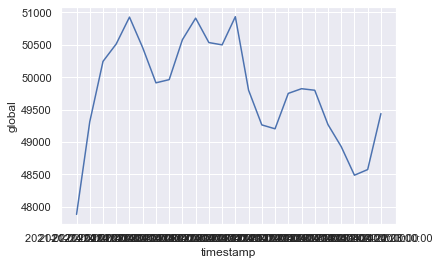

In [46]:

sns.set_theme(style="darkgrid")
sns.lineplot(x="timestamp", y="global",data=stat_data)

### Conclusion: 
    C'est un projet concrèt qui nous a permit déjà de travailler de manière collaborative, sur un cas réel, et d'adorder des notions vu en cours.